In [1]:
import os
from os.path import abspath

from nipype import Workflow, Node, MapNode, Function
from nipype.interfaces.fsl import BET, IsotropicSmooth, ApplyMask

from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import nipype
# nipype.__version__

# !fsl -version

In [3]:
# input_file =  abspath("\OneDrive\Desktop\FMRI\sub-1\ses-1\anat\sub-1_ses-1_T1w.nii.gz")
# out_file = abspath("\OneDrive\Desktop\output\T1w_nipype_bet.nii.gz")

In [4]:
# bet = BET()
# bet.inputs.in_file = input_file
# bet.inputs.out_file = "\OneDrive\Desktop\output\T1w_nipype_bet.nii.gz"
# res = bet.run()

In [5]:
from nipype import Node, Workflow
from nipype.interfaces.fsl import SliceTimer, MCFLIRT, Smooth

slicetimer_func = Node(SliceTimer(index_dir=False,
                             interleaved=True,
                             time_repetition=3),
                  name="slicetimer_func")

# mcflirt = Node(MCFLIRT(mean_vol=True,
#                        save_plots=True),
#                name="mcflirt")


smooth_func = Node(Smooth(fwhm=4), name="smooth_func")


In [6]:
preproc02 = Workflow(name='preproc02', base_dir=".")
preproc02.connect([(slicetimer_func, smooth_func, [('slice_time_corrected_file', 'in_file')])])

In [8]:
os.chdir('Desktop/fmri')

#C:\Users\kochh\OneDrive\Desktop\FMRI\preproc01

In [9]:
os.getcwd()

'/home/swati/Desktop/fmri'

In [10]:
import os 

os.makedirs('preproc02',exist_ok=True)
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
preproc02.write_graph(graph2use='orig')

#C:\Users\kochh\Desktop\FMRI\preproc01

230812-12:08:07,733 nipype.workflow INFO:
	 Generated workflow graph: /home/swati/Desktop/fmri/preproc02/graph.png (graph2use=orig, simple_form=True).


'/home/swati/Desktop/fmri/preproc02/graph.png'

In [11]:
ls

fmri2/  preproc01/  preproc02/  sub-1/  sub-2/  sub-3/


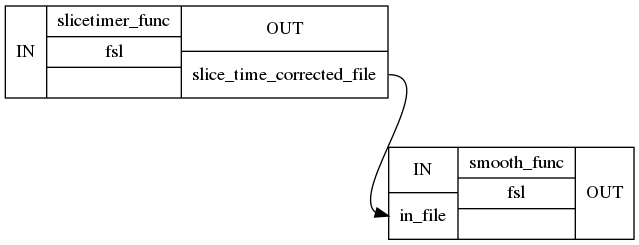

In [12]:
from IPython.display import Image
Image(filename="preproc02/graph_detailed.png")

In [13]:
!cd 

In [14]:
!pwd

/home/swati/Desktop/fmri


In [15]:

slicetimer_func.inputs.in_file = '/home/swati/Desktop/fmri/sub-1/ses-1/func/sub-1_ses-1_task-rest_bold.nii.gz'
# mcflirt.inputs.in_file = '/home/swati/Desktop/fmri/preproc01/slicetimer/sub-1_ses-1_task-rest_bold_st.nii.gz'


In [16]:

preproc02.run('MultiProc', plugin_args={'n_procs': 3})  

230812-12:08:08,317 nipype.workflow INFO:
	 Workflow preproc02 settings: ['check', 'execution', 'logging', 'monitoring']
230812-12:08:08,321 nipype.workflow INFO:
	 Running in parallel.
230812-12:08:08,325 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.16/28.16, Free processors: 3/3.
230812-12:08:08,469 nipype.workflow INFO:
	 [Node] Setting-up "preproc02.slicetimer_func" in "/home/swati/Desktop/fmri/preproc02/slicetimer_func".
230812-12:08:08,477 nipype.workflow INFO:
	 [Node] Executing "slicetimer_func" <nipype.interfaces.fsl.preprocess.SliceTimer>
230812-12:08:10,330 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 27.96/28.16, Free processors: 2/3.
                     Currently running:
                       * preproc02.slicetimer_func
230812-12:10:14,369 nipype.workflow INFO:
	 [Node] Finished "slicetimer_func", elapsed time 125.889097s.
230812-12:10:14,446 nipype.workflow INFO:
	 [Job 0] Comple

In [17]:
cd

/home/swati


In [18]:
!tree /home/swati/Desktop/fmri/preproc02

/home/swati/Desktop/fmri/preproc02
├── d3.js
├── graph1.json
├── graph_detailed.dot
├── graph_detailed.png
├── graph.dot
├── graph.json
├── graph.png
├── index.html
├── slicetimer_func
│   ├── _0xfc89028ae8d520091871d04af220965d.json
│   ├── command.txt
│   ├── _inputs.pklz
│   ├── _node.pklz
│   ├── _report
│   │   └── report.rst
│   ├── result_slicetimer_func.pklz
│   └── sub-1_ses-1_task-rest_bold_st.nii.gz
└── smooth_func
    ├── _0x50c6f992a4a161ff3a9dd613b03f64eb.json
    ├── command.txt
    ├── _inputs.pklz
    ├── _node.pklz
    ├── _report
    │   └── report.rst
    ├── result_smooth_func.pklz
    └── sub-1_ses-1_task-rest_bold_st_smooth.nii.gz

4 directories, 22 files


In [19]:
from nilearn import image, plotting
out_path = '/home/swati/Desktop/fmri/preproc02'



In [44]:
# plotting.plot_epi(
#     '/home/swati/Desktop/fmri/sub-1/ses-1/func/sub-1_ses-1_task-rest_bold.nii.gz',
#     title="T1", display_mode='ortho', annotate=False, draw_cross=False, cmap='gray');


In [29]:
import nibabel as nib
img = nib.load('/home/swati/Desktop/fmri/sub-1/ses-1/func/sub-1_ses-1_task-rest_bold.nii.gz')
type(img)

nibabel.nifti1.Nifti1Image

In [30]:
data = img.get_fdata()
type(data)

numpy.ndarray

In [31]:
data.shape

(224, 224, 38, 200)

In [32]:
first_vol = data[:, :, :, 0]
first_vol.shape

(224, 224, 38)

(-0.5, 223.5, 223.5, -0.5)

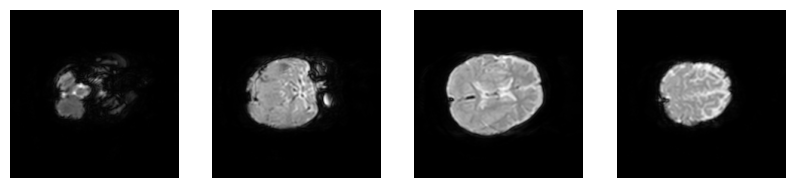

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(1, 4, 1)
plt.imshow(first_vol[:, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_vol[:, :, 10], cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(first_vol[:, :, 20], cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(first_vol[:, :, 30], cmap='gray')
plt.axis('off')

Number of frames =  224


/tmp/ipykernel_5467/1951479446.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


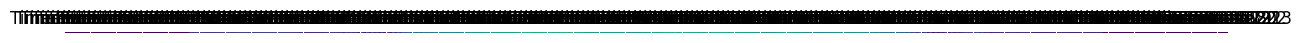

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Plot a series of 3D slices (e.g., middle slices) from the 4D data
num_frames = data.shape[0]
print("Number of frames = ", num_frames)

middle_slice = data.shape[0] // 2  # Choose a middle slice for visualization

# Create a figure with multiple subplots

fig, axes = plt.subplots(1, num_frames, figsize=(15, 5))

# Loop through each time frame and plot the middle slice
for i in range(num_frames):
    axes[i].imshow(data[i, middle_slice-1], cmap='viridis')
    axes[i].set_title(f'Time Frame {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# par = np.loadtxt('/home/swati/Desktop/fmri/preproc01/slicetimer/sub-1_ses-1_task-rest_bold_st.nii.gz')
# fig, axes = plt.subplots(2, 1, figsize=(15, 5))
# axes[0].set_ylabel('rotation (radians)')
# axes[0].plot(par[0:, :3])
# axes[1].plot(par[0:, 3:])
# axes[1].set_xlabel('time (TR)')
# axes[1].set_ylabel('translation (mm)');